## Visualing Significant Global Earthquakes
The database used here contains information about all significant earthquakes that have occurred across the globe between 1965 and 2015. These earthquakes are significant because all of them have a magnitude of 5.5 and above, and generally are the only types of earthquakes to cause noticeable damage. I shall also be using a dataset to map out the tectonic plate boundaries across the globe so we can see how the earthquakes align with these boundaries. 

In [1]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(ggpubr)

tectonic_boundaries <- read_csv("tectonic_boundaries.csv", col_types=cols())
global_earthquakes <- read_csv("earthquake_database.csv", col_types=cols())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   1.0.0     
✔ tidyr   1.1.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“3 parsing failures.
  row  col   expected                   actual                                        file
 3379 Time time like  1975-02-23T02:58:41.000Z '../input/earthquake-database/database.csv'
 7513 Time time like  1985-04-28T02:53:41.530Z '../input/earthquake-database/database.csv'
20651 Time time like  2011-03-13T02:23:34.520Z '../input/earthquake-database/database.csv'
”


In [2]:
# For a given region in the world (e.g. Italy), retrieves the map data, 
# position of any tectonic boundaries, and the list of significant 
# earthquakes that been recorded in the region between 1965 - 2015.

get_region_data <- function(map, region) {
    
    region_map <- map_data(map, region)

    min_lat <- min(region_map$lat)
    max_lat <- max(region_map$lat)
    min_lon <- min(region_map$long)
    max_lon <- max(region_map$long)

    region_tectonic_boundaries <- tectonic_boundaries %>%
                                     filter((lat > min_lat) & (lat < max_lat)) %>%
                                     filter((lon > min_lon) & (lon < max_lon))
    region_earthquakes <- global_earthquakes %>%
                             filter((Latitude > min_lat) & (Latitude < max_lat)) %>%
                             filter((Longitude > min_lon) & (Longitude < max_lon))
    
    return(list(map=region_map, tectonics=region_tectonic_boundaries, earthquakes=region_earthquakes))
}

In [3]:
# For a given region in the world, uses ggplot2 to plot a map of the region.
# along with the location of any tectonic boundaries, and points for all 
# recorded earthquakes.

map_earthquakes_for_region <- function(map, region) {
    
    region_data <- get_region_data(map, region)
    
    plot <- ggplot() + 
        geom_polygon(data=region_data$map,
            aes(x=long, y=lat, group=group), 
            fill="grey", 
            color="white") + 
        theme(panel.background=element_blank(),
              plot.title=element_text(hjust=0.5, size=22),
              plot.subtitle=element_text(hjust=0.5, size=14)) +
        geom_point(data=region_data$tectonics,
                   aes(x=lon, y=lat),
                   size=2,
                   color="green") +
        geom_point(data=region_data$earthquakes,
                   aes(x=Longitude, y=Latitude, size=Magnitude, color=Magnitude)) + 
        scale_color_gradient(low="yellow",high="darkred") + 
        guides(size=FALSE) +
        labs(x="Longitude", 
             y="Latitude",
             title=paste("Earthquakes in", region, "- 1965 to 2015"),
             subtitle="(tectonic plate boundaries indicated by green dots)")
    
    return(plot)
}

In [4]:
# For a given region in the world, uses ggplot2 to plot a histogram
# that shows the number of earthquakes that have occurred for each
# magnitude interval.

plot_histogram_for_region <- function(map, region) {
    
    region_data <- get_region_data(map, region)
    
    plot <- ggplot(region_data$earthquakes, aes(x=Magnitude)) +
        geom_histogram(bins=10, fill="steelblue") +
        labs(x="Earthquake Magnitude", 
             y="Number of Occurences",
             title=paste("Magnitude of Earthquakes in", region)) +
        theme_hc() +
        theme(plot.title=element_text(hjust=0.5, size=16))
    
    return(plot)
}

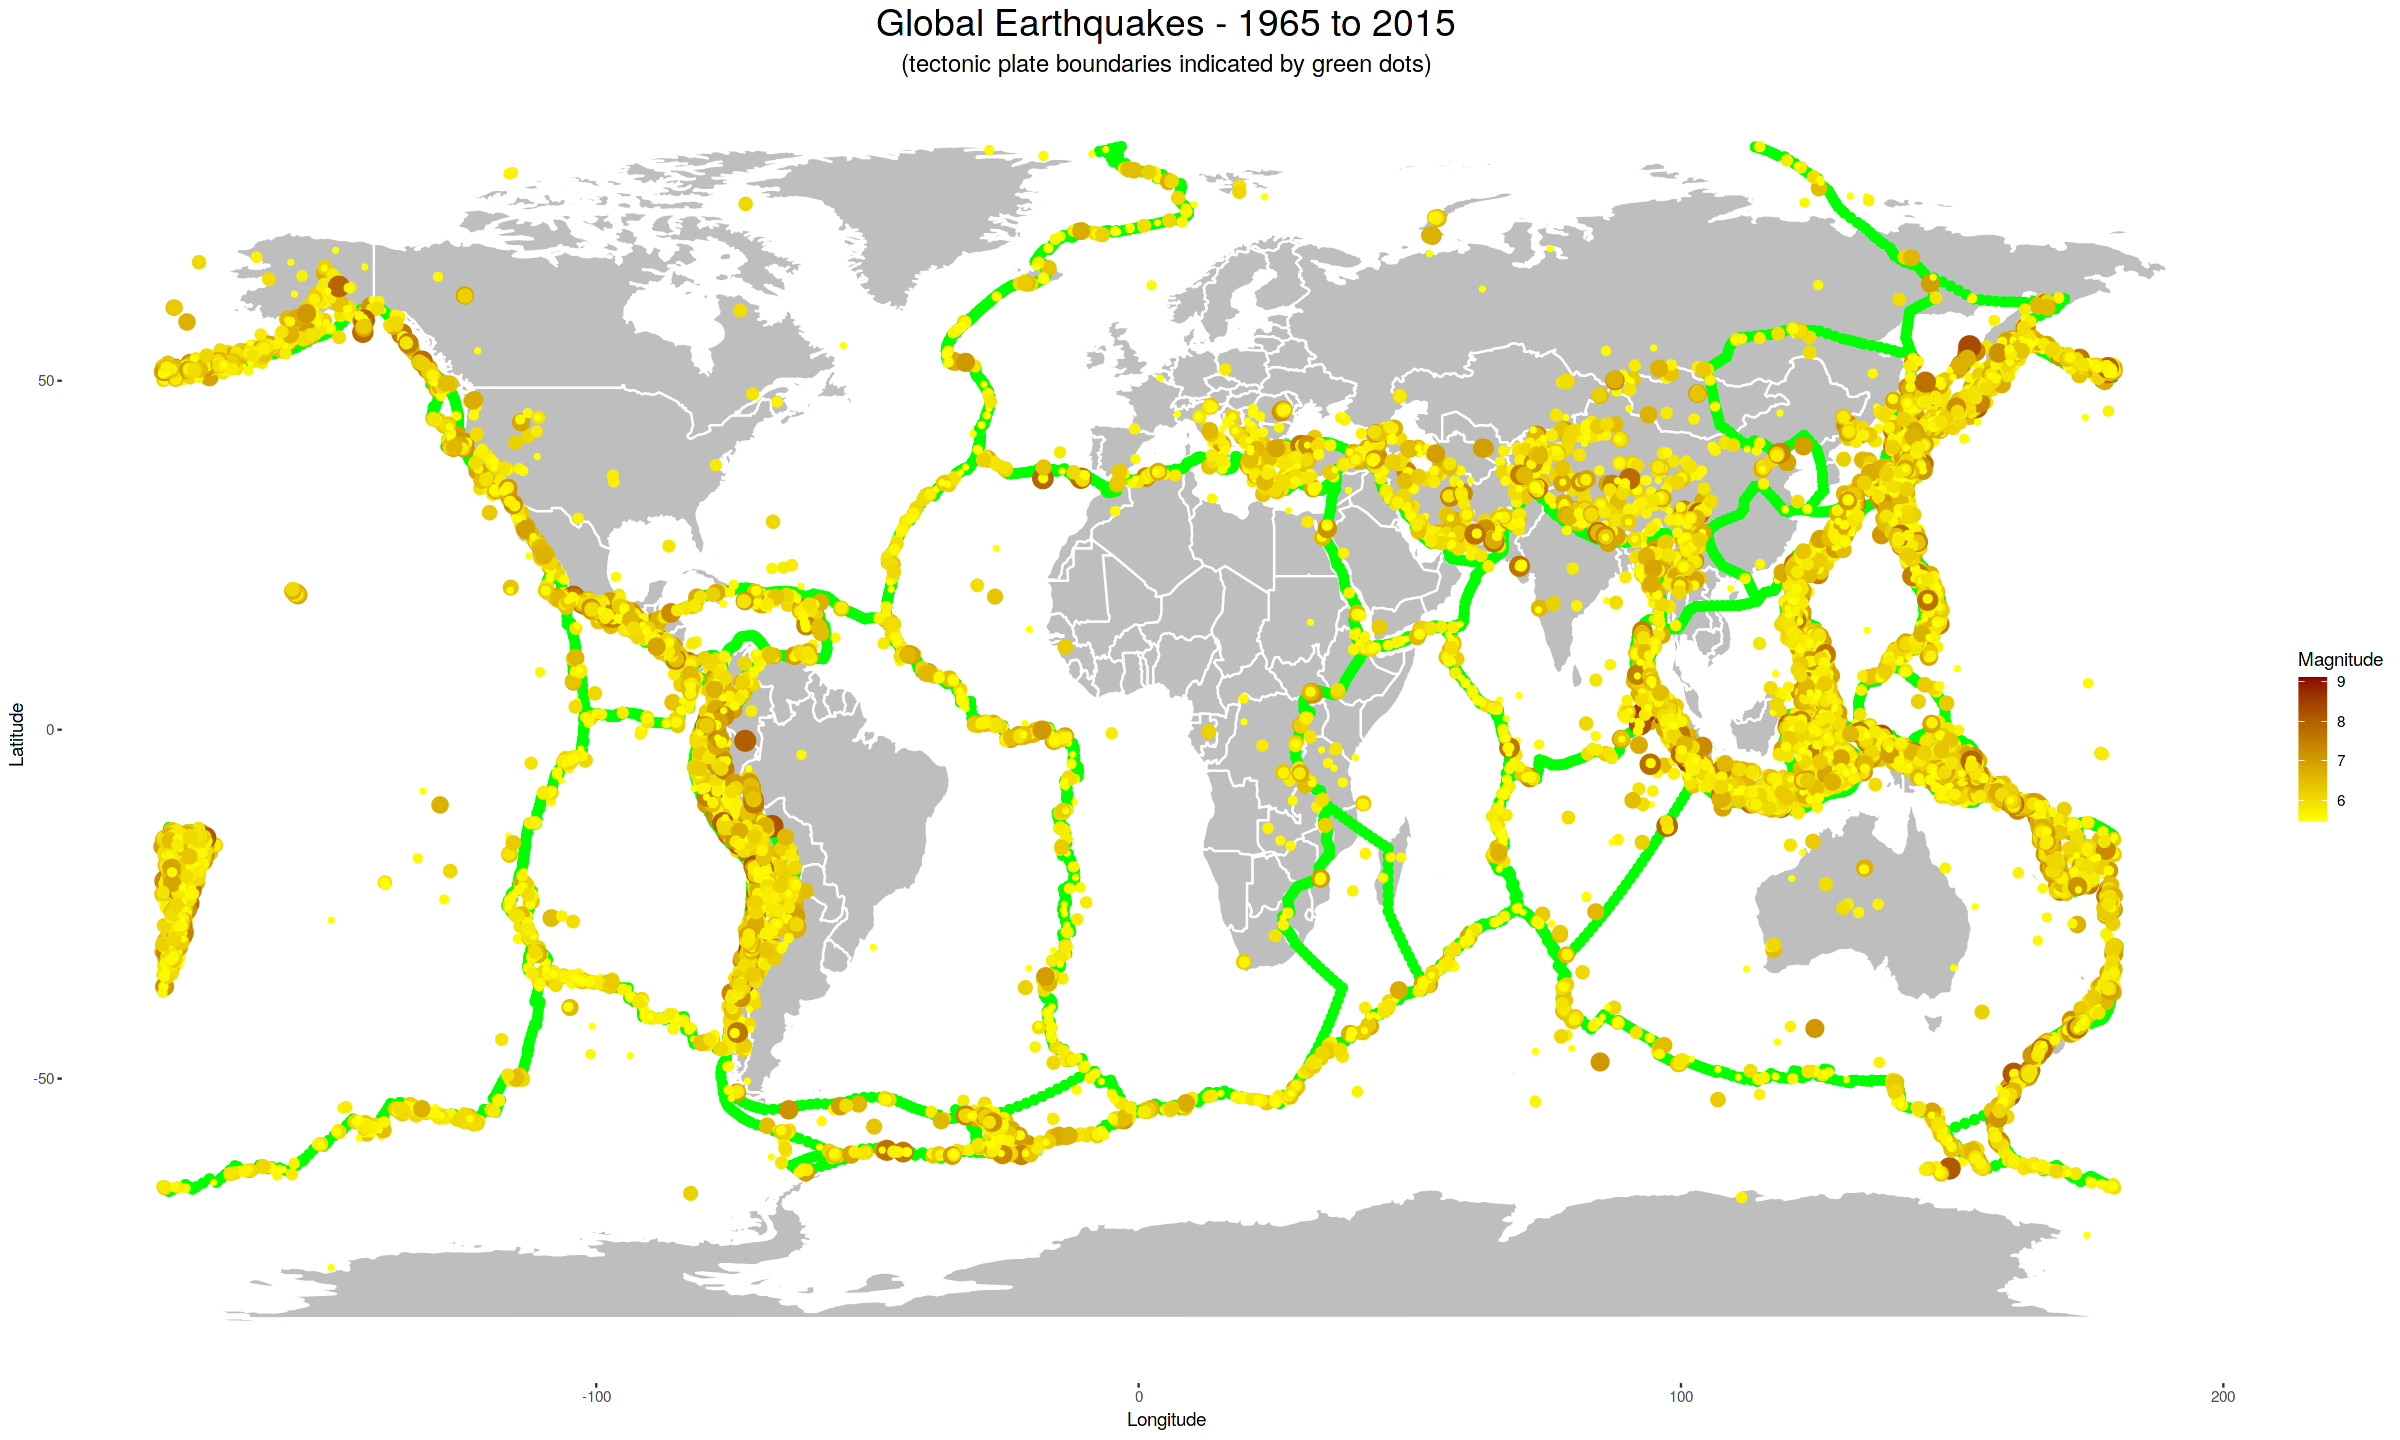

In [5]:
options(repr.plot.width=20, repr.plot.height=12)
map_earthquakes_for_region("world", NULL) + ggtitle("Global Earthquakes - 1965 to 2015")

I'm going to take a closer look at the top countries affected by earthquakes in the world. It will be interesting to see not just the number of earthquakes, but their magnitudes as well. Some of these countries may experience less frequent but higher magnitude earthquakes, thus suffering a lot more damage than lots of lower magnitude earthquakes.

Top Countries for Earthquakes:

* Japan
* Indonesia
* China
* USA
* Peru
* Mexico
* Turkey
* Greece
* Italy
* Iran
* India
* Afghanistan

Source: https://www.worldatlas.com/articles/the-world-s-10-most-earthquake-prone-countries.html

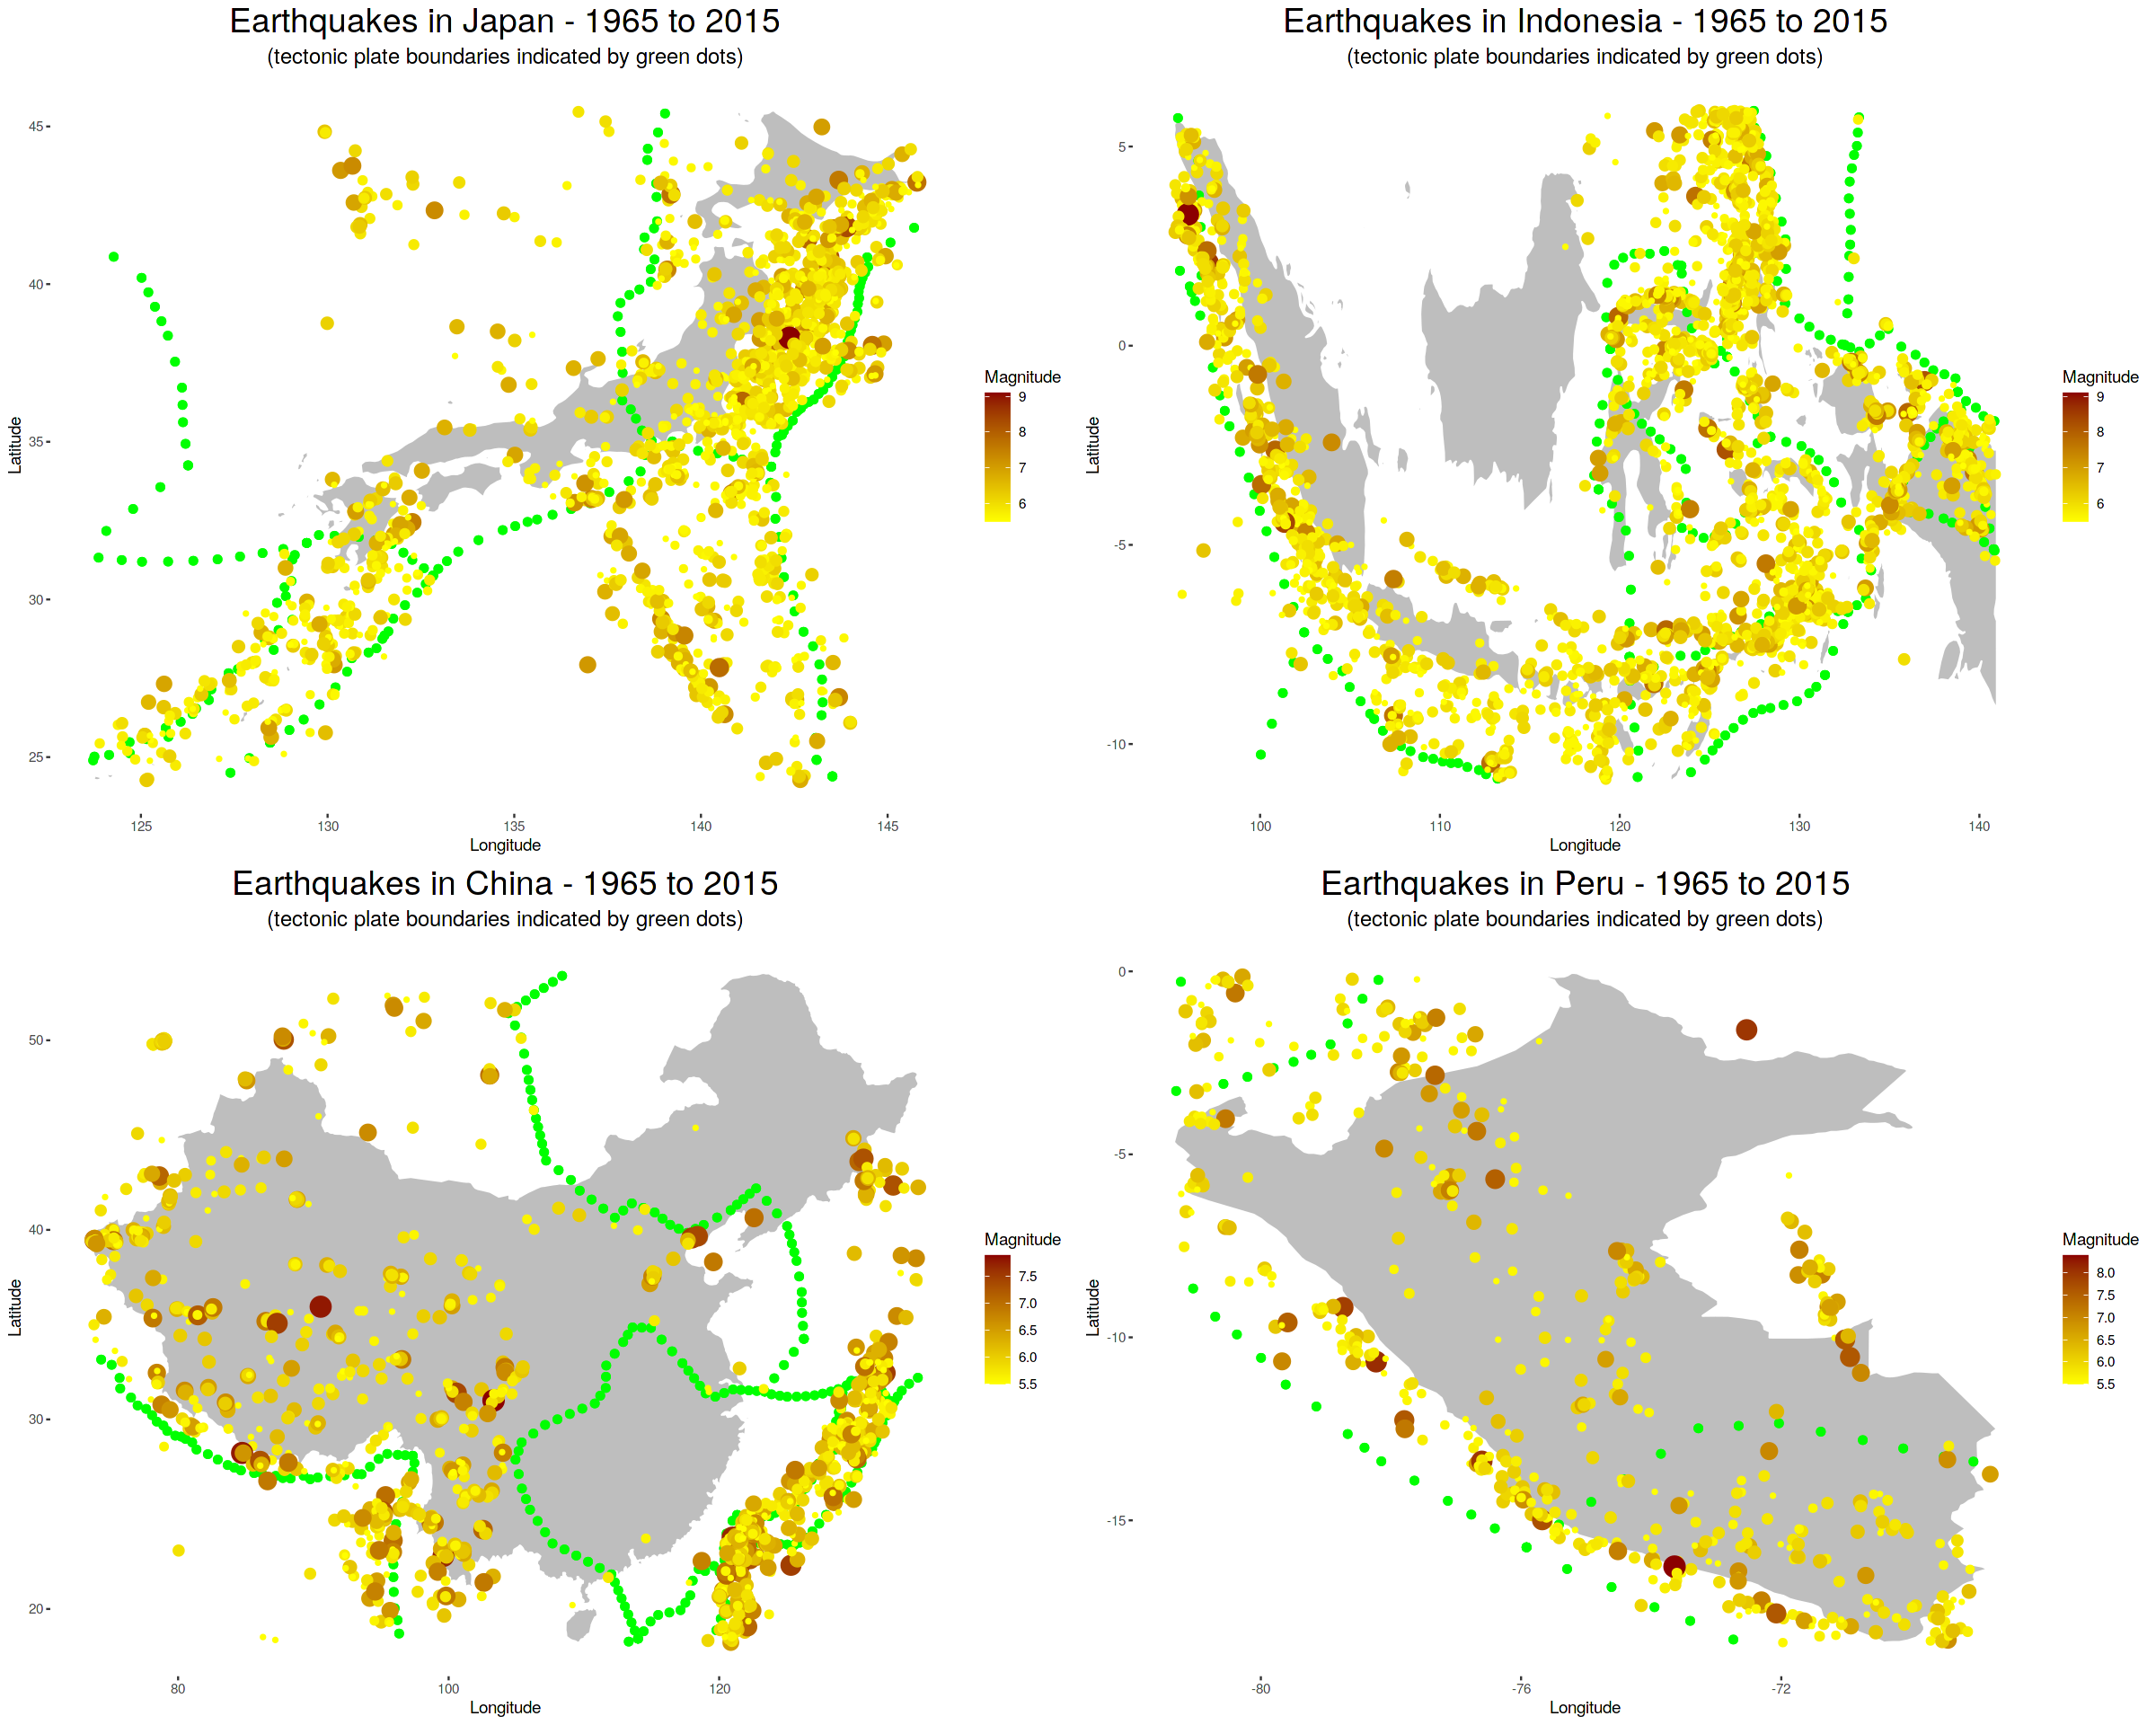

In [6]:
japan <- map_earthquakes_for_region("world", "Japan")
indonesia <- map_earthquakes_for_region("world", "Indonesia")
china <- map_earthquakes_for_region("world", "China")
peru <- map_earthquakes_for_region("world", "Peru")

options(repr.plot.width=20, repr.plot.height=16)
ggarrange(japan, indonesia, china, peru,
          ncol=2, nrow=2)

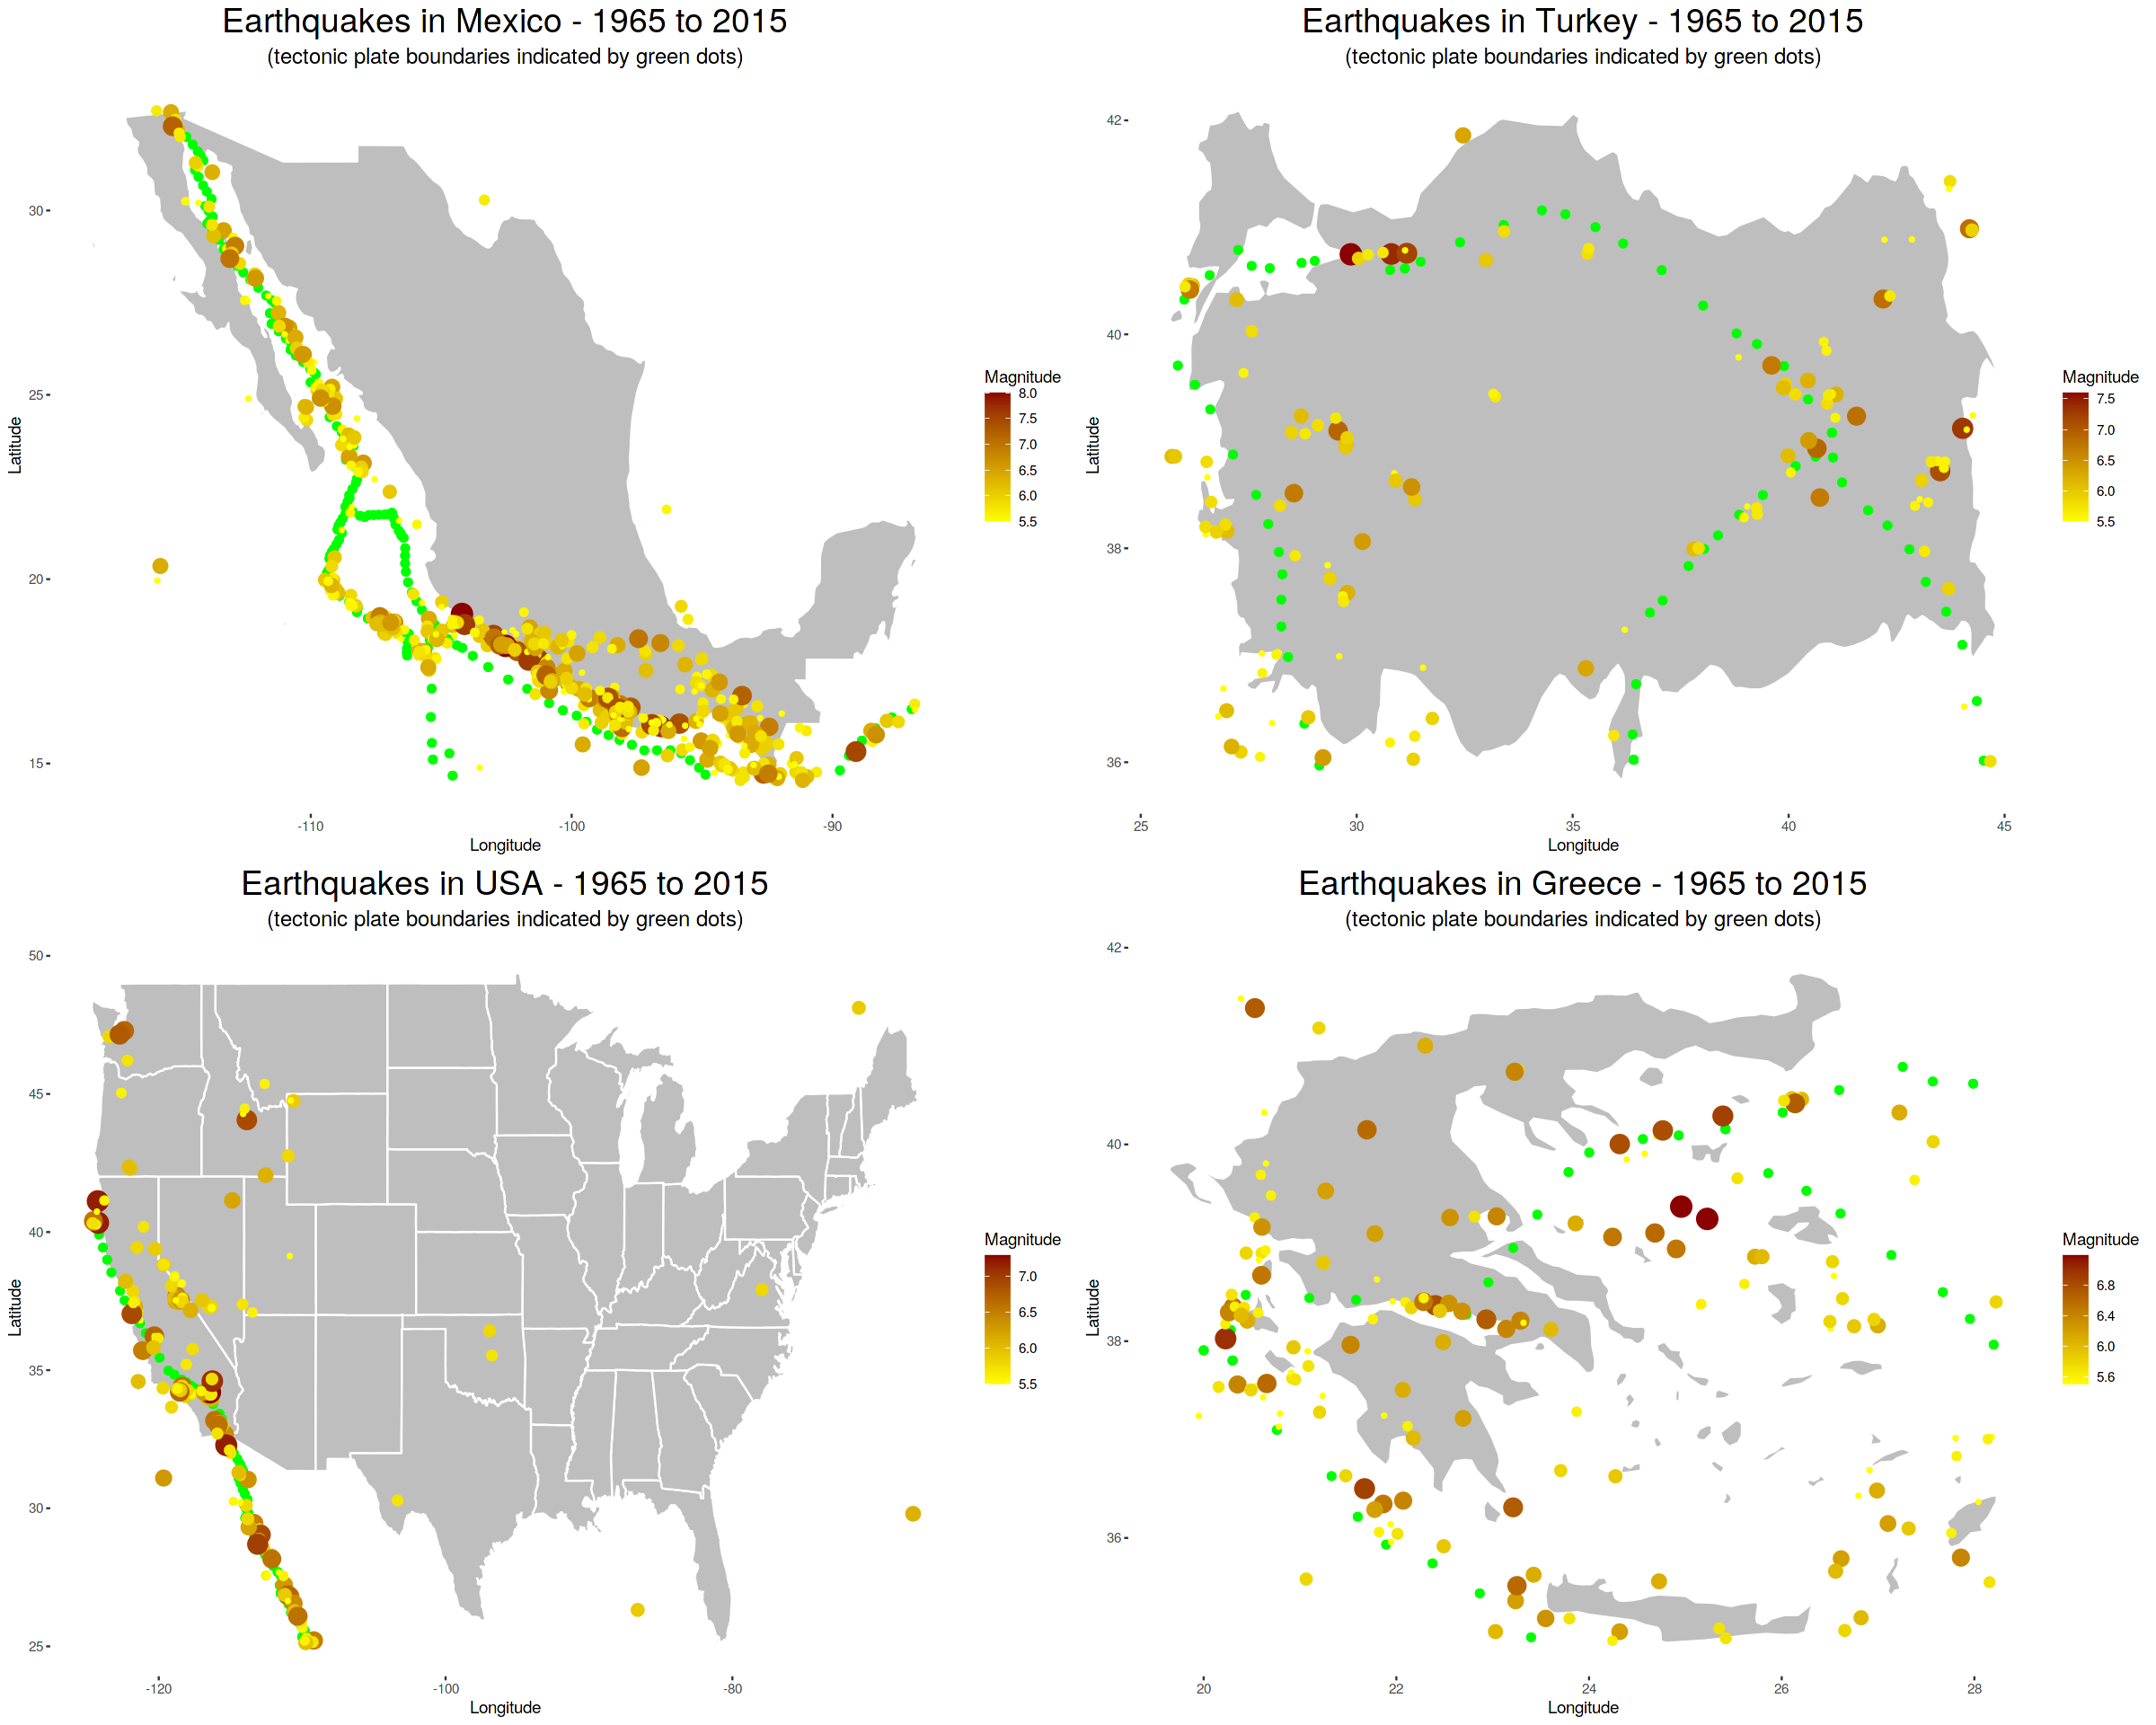

In [7]:
mexico <- map_earthquakes_for_region("world", "Mexico")
turkey <- map_earthquakes_for_region("world", "Turkey")
usa <- map_earthquakes_for_region("state", NULL) + ggtitle("Earthquakes in USA - 1965 to 2015")
greece <- map_earthquakes_for_region("world", "Greece")

options(repr.plot.width=20, repr.plot.height=16)
ggarrange(mexico, turkey, usa, greece,
          ncol=2, nrow=2)

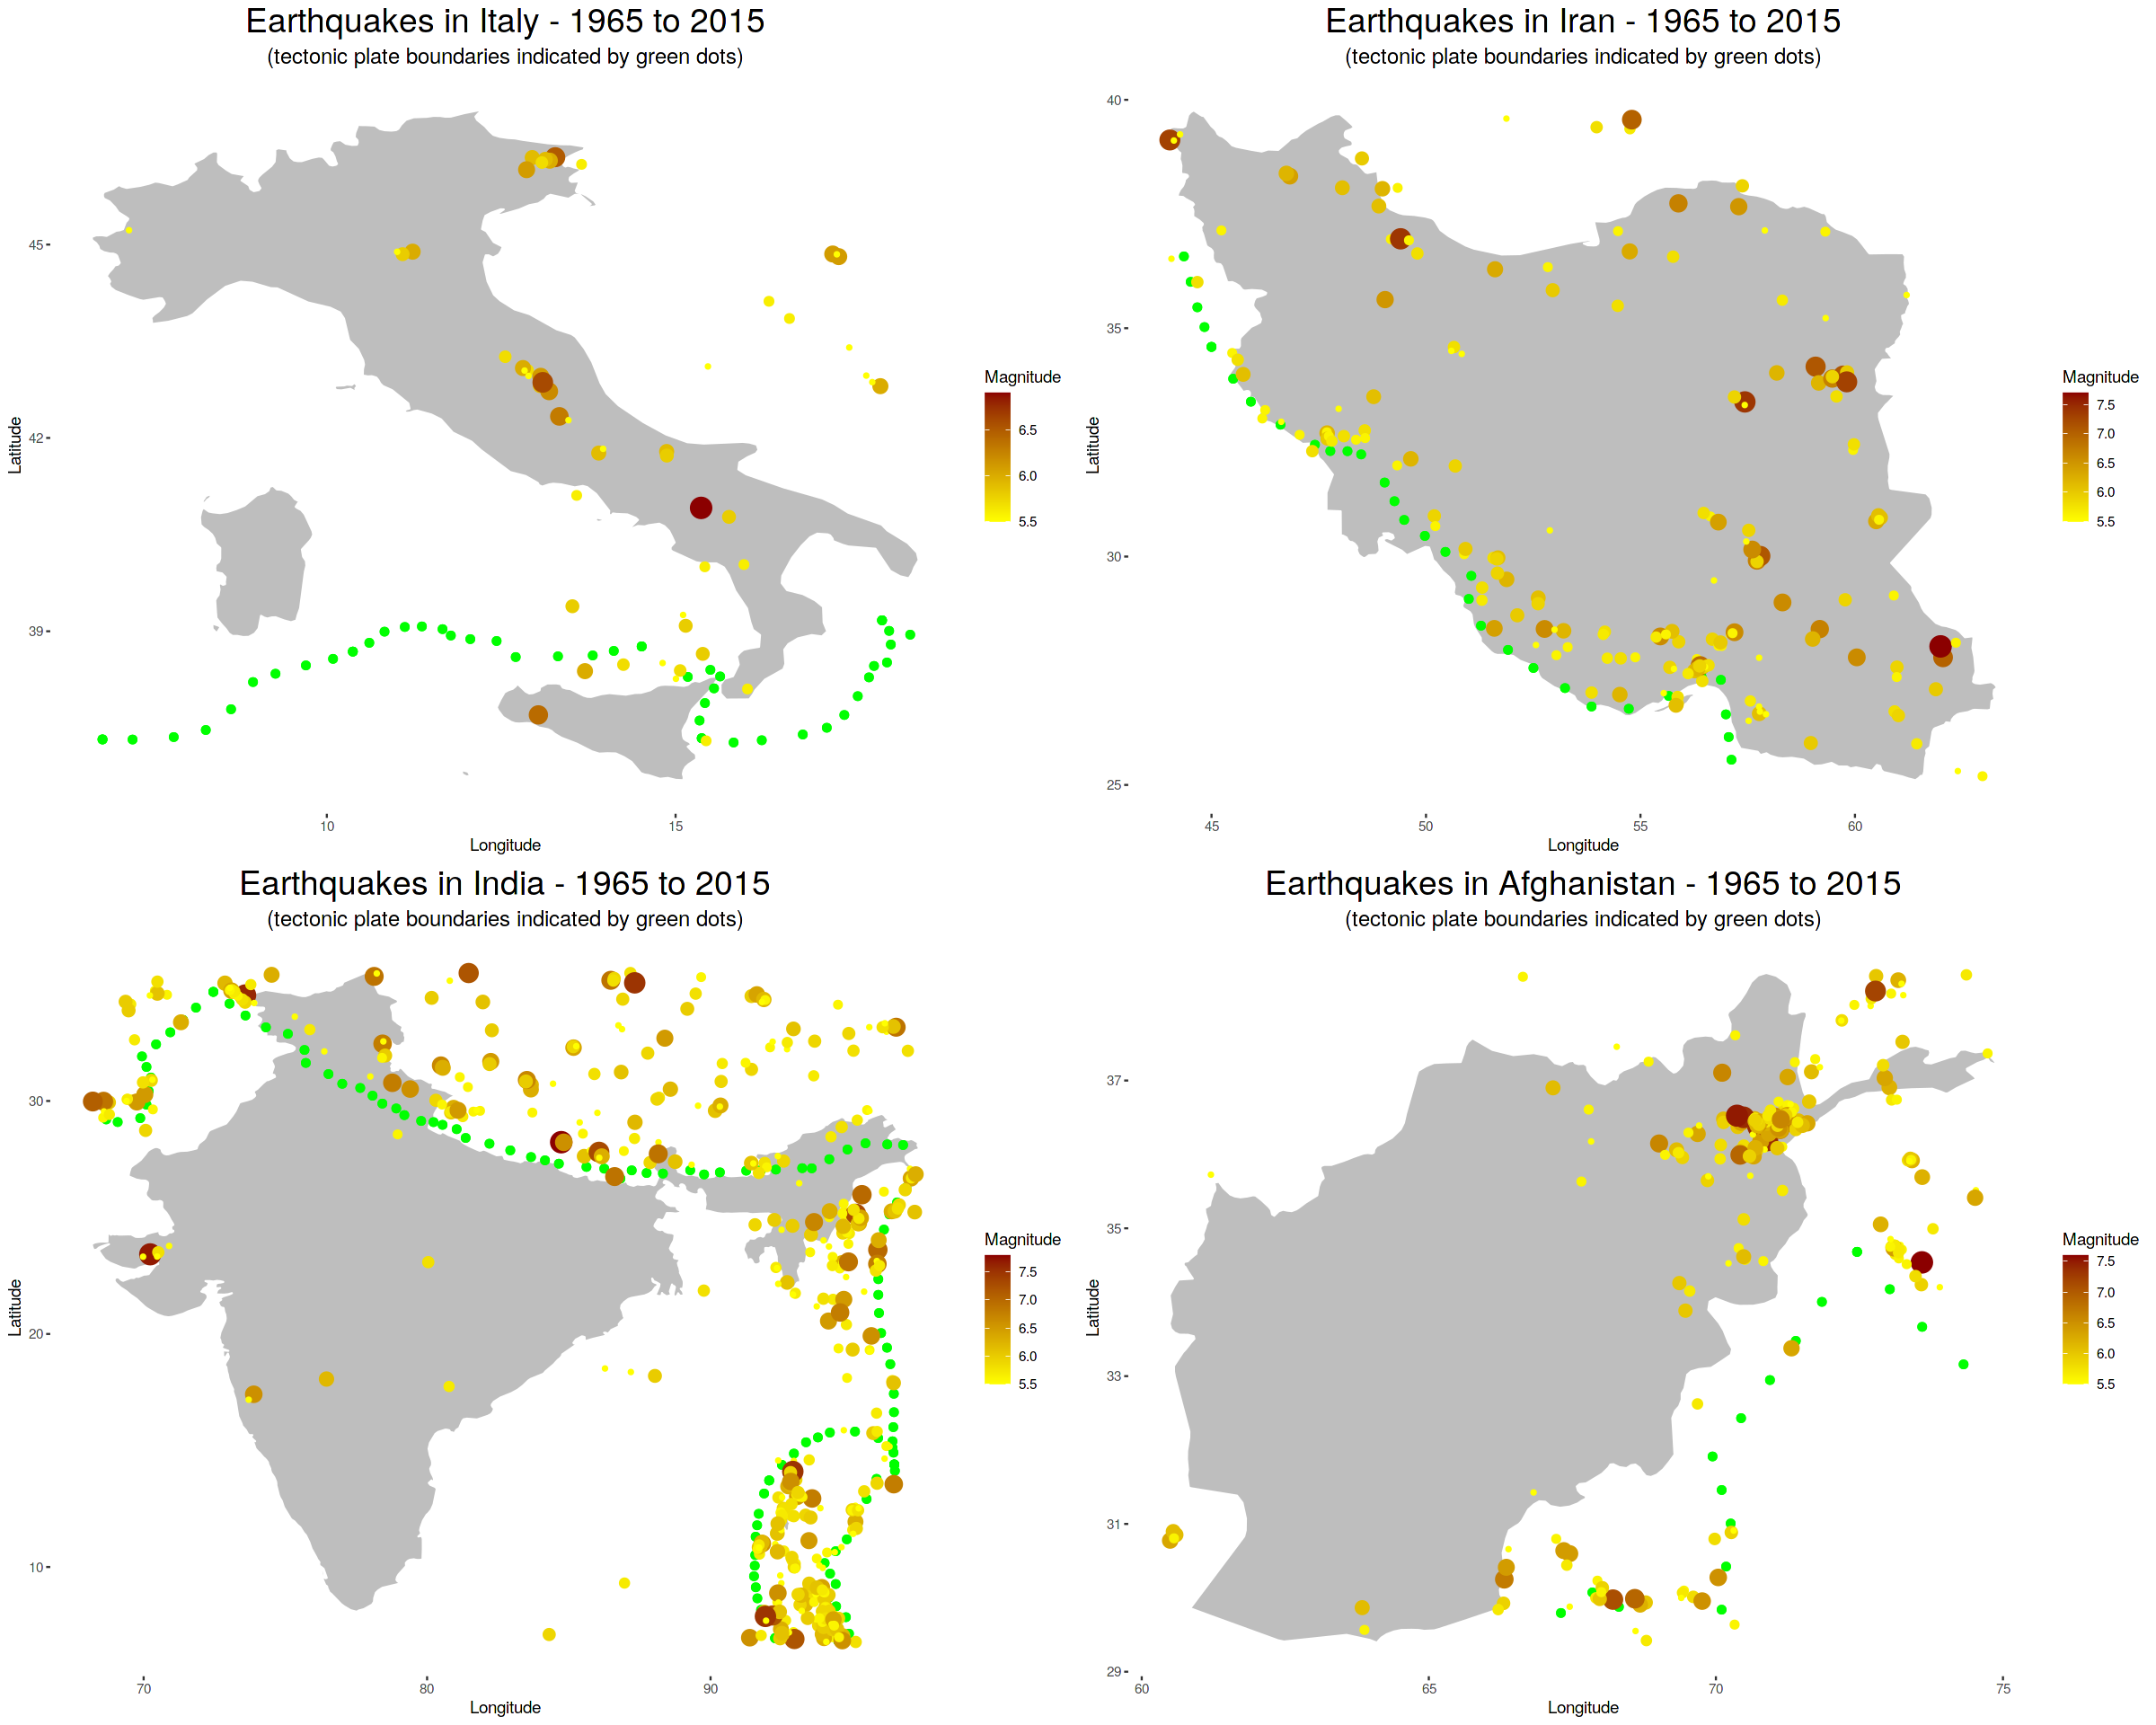

In [8]:
italy <- map_earthquakes_for_region("world", "Italy")
iran <- map_earthquakes_for_region("world", "Iran")
india <- map_earthquakes_for_region("world", "India")
afghanistan <- map_earthquakes_for_region("world", "Afghanistan")

options(repr.plot.width=20, repr.plot.height=16)
ggarrange(italy, iran, india, afghanistan,
          ncol=2, nrow=2)

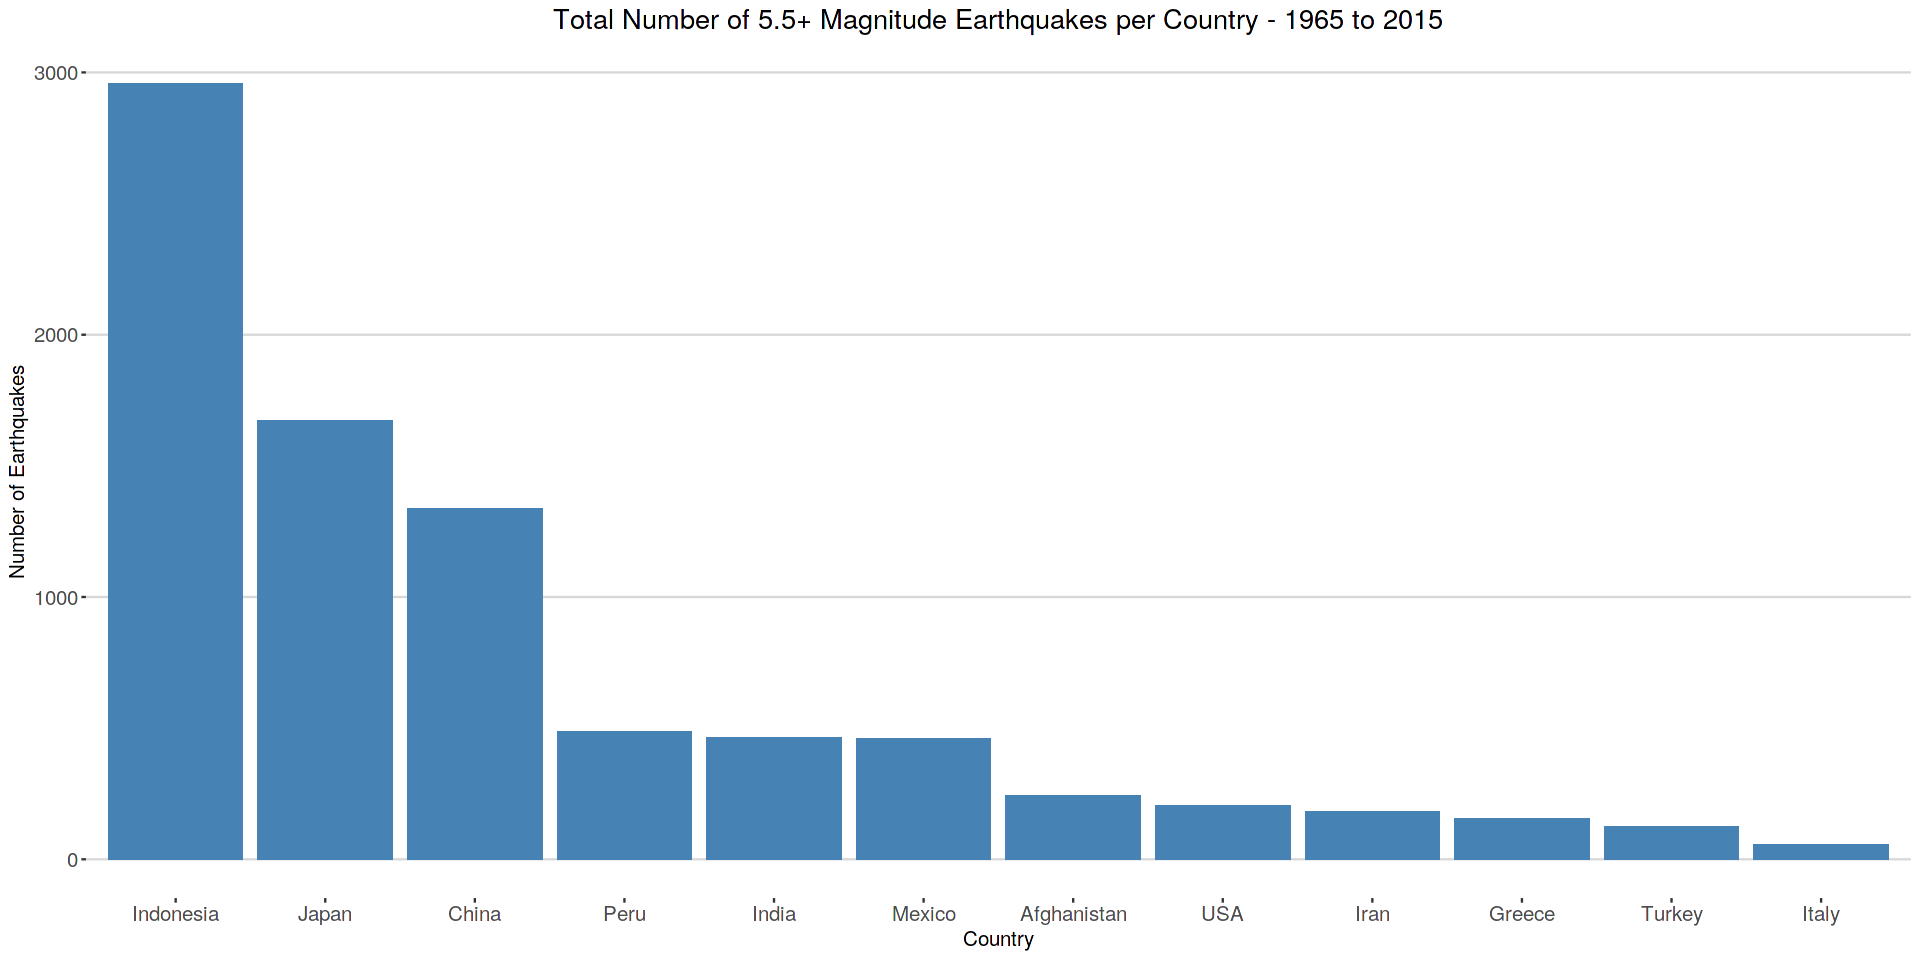

In [9]:
countries <- c("Japan", "Indonesia", "China", "Peru", "Mexico", "Turkey", "Greece", "Italy", "Iran", "India", "Afghanistan")
eq_freq <- c()

for (country in countries) {
    region_data <-  get_region_data("world", country)
    eq_freq <- c(eq_freq, dim(region_data$earthquakes)[1])
}

countries <- c(countries, "USA")
region_data <-  get_region_data("state", NULL)
eq_freq <- c(eq_freq, dim(region_data$earthquakes)[1])

earthquake_frequency_by_country <- data.frame(countries, eq_freq)
earthquake_frequency_by_country <- arrange(earthquake_frequency_by_country, desc(eq_freq))      

options(repr.plot.width=16, repr.plot.height=8)
ggplot(earthquake_frequency_by_country) + 
    geom_bar(aes(x=reorder(countries, -eq_freq), y=eq_freq), stat="identity", fill="steelblue") +
    theme_hc() +
    theme(axis.text=element_text(size=12),
          plot.title=element_text(hjust=0.5, size=16)) +
    labs(x="Country", 
         y="Number of Earthquakes", 
         title="Total Number of 5.5+ Magnitude Earthquakes per Country - 1965 to 2015")

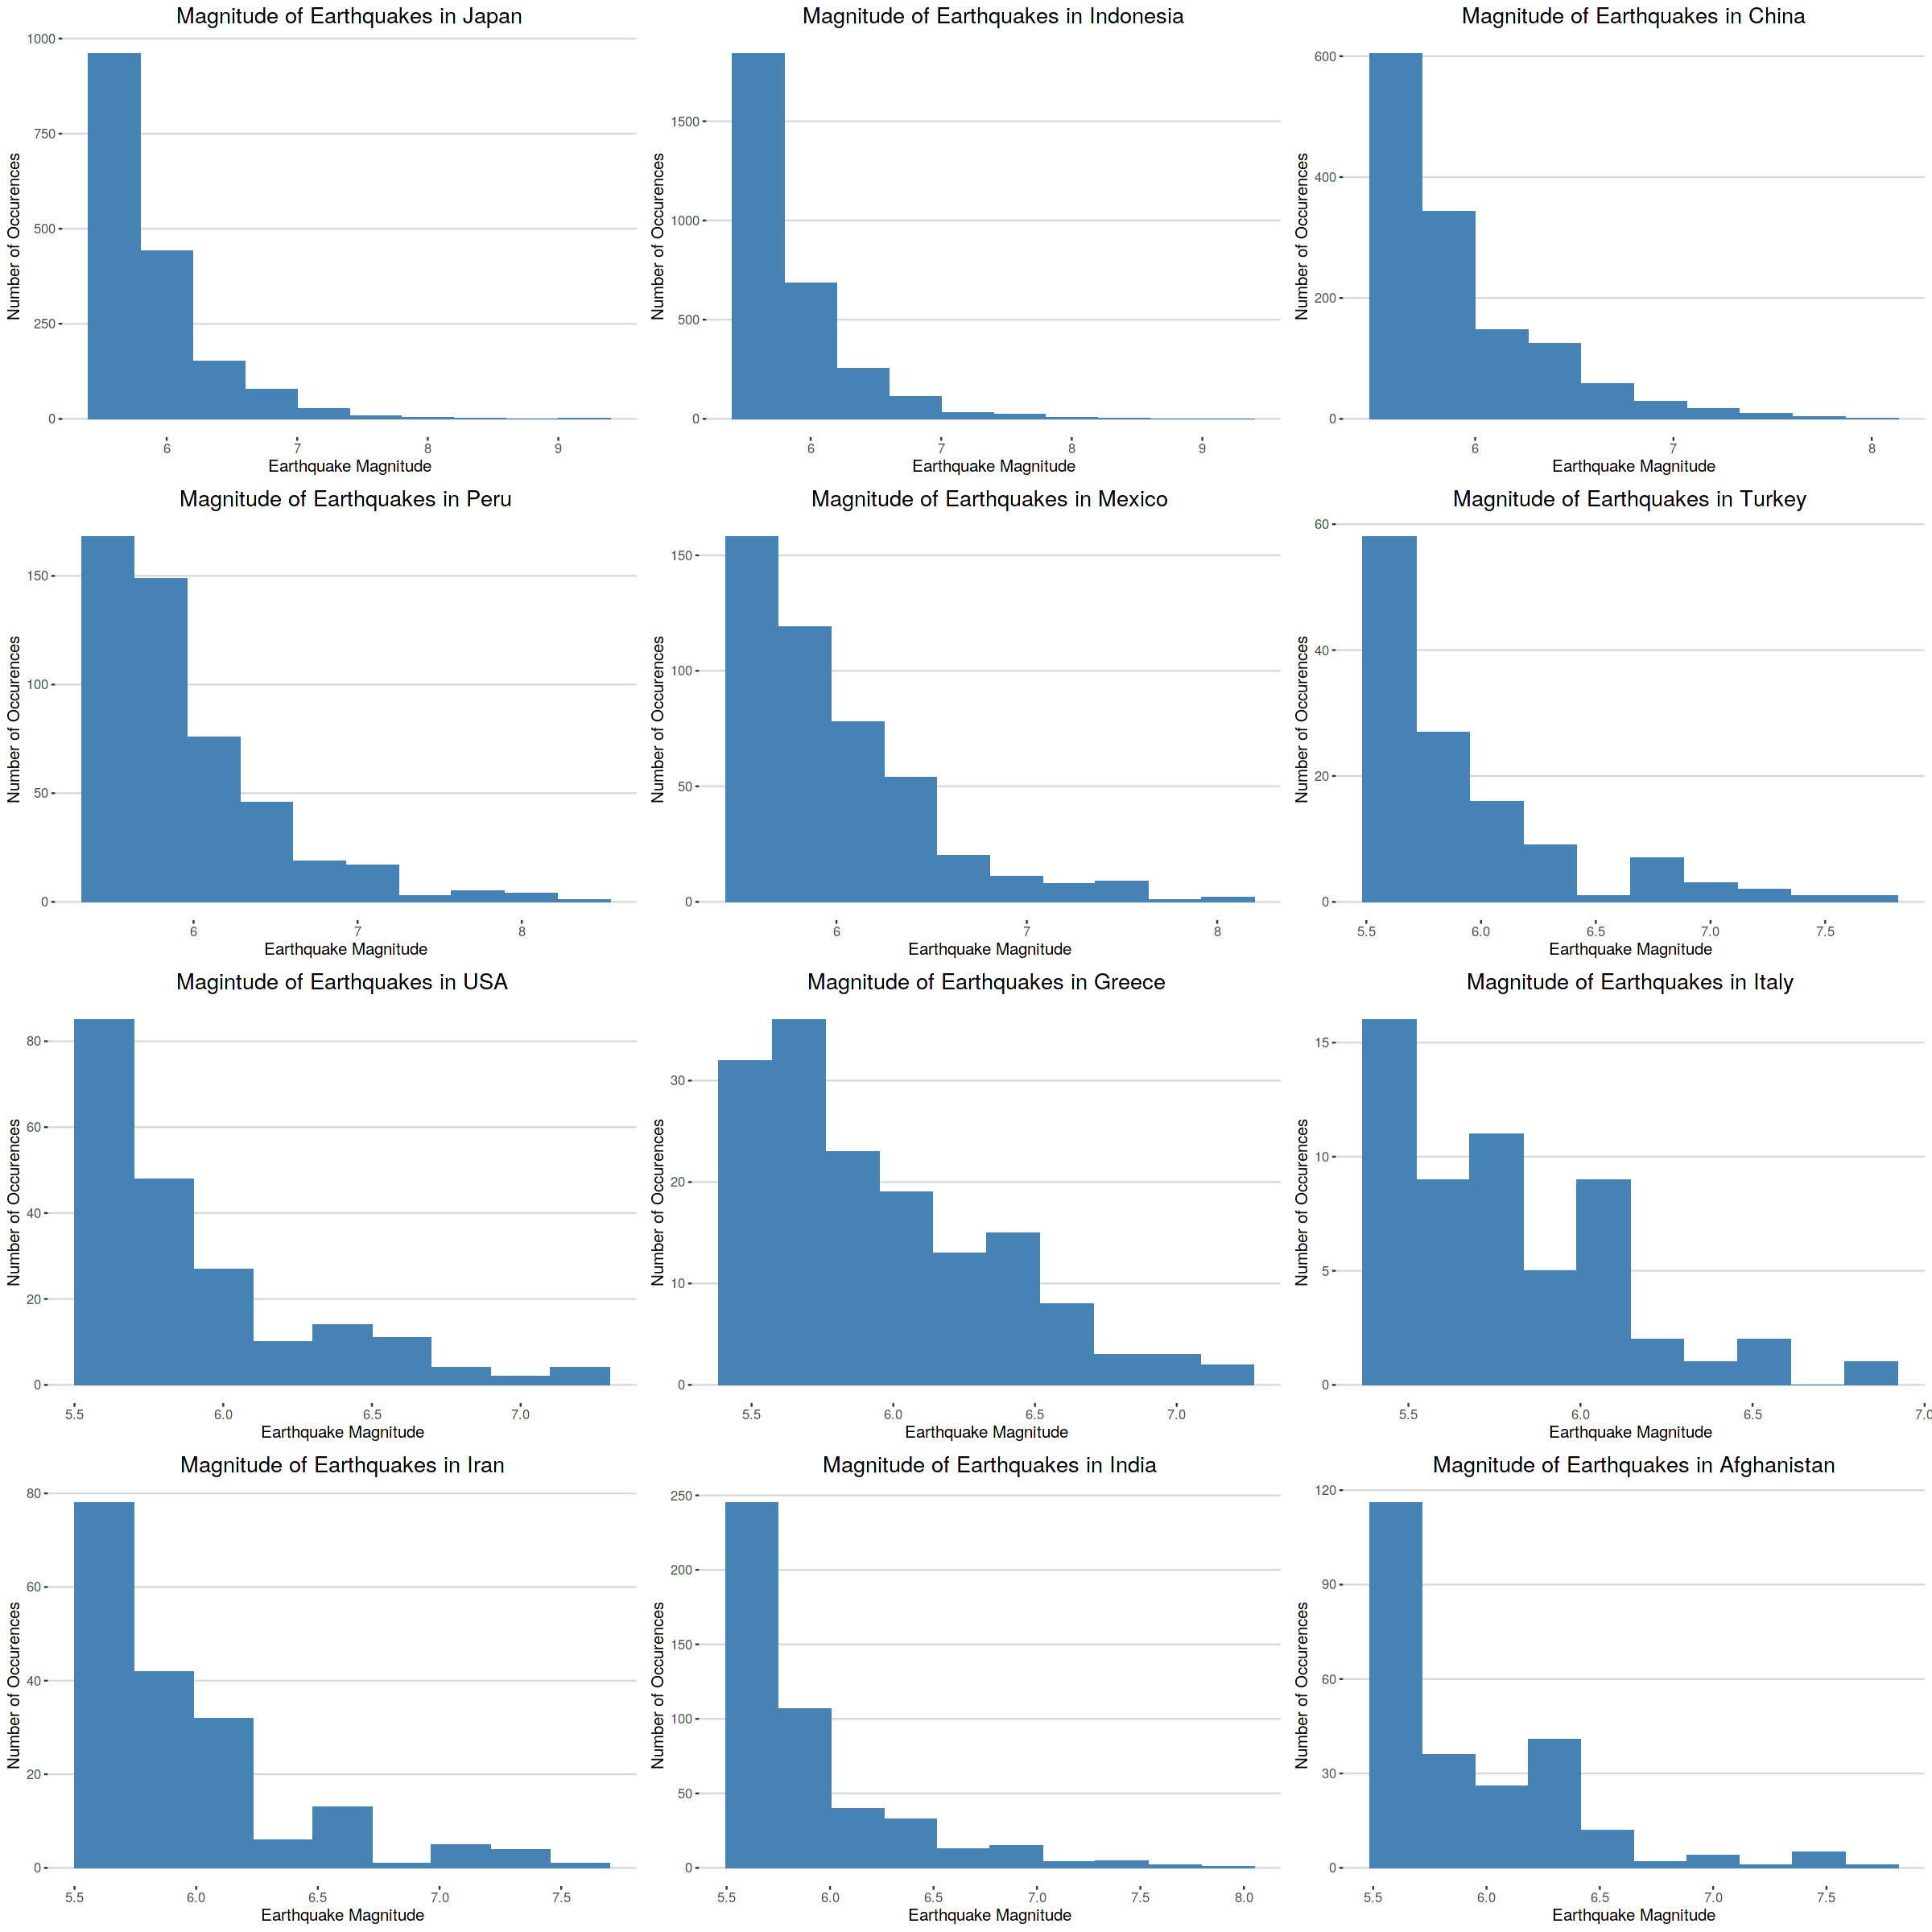

In [10]:
japan <- plot_histogram_for_region("world", "Japan")
indonesia <- plot_histogram_for_region("world", "Indonesia")
china <- plot_histogram_for_region("world", "China")
peru <- plot_histogram_for_region("world", "Peru")
mexico <- plot_histogram_for_region("world", "Mexico")
turkey <- plot_histogram_for_region("world", "Turkey")
usa <- plot_histogram_for_region("state", NULL) + ggtitle("Magintude of Earthquakes in USA")
greece <- plot_histogram_for_region("world", "Greece")
italy <- plot_histogram_for_region("world", "Italy")
iran <- plot_histogram_for_region("world", "Iran")
india <- plot_histogram_for_region("world", "India")
afghanistan <- plot_histogram_for_region("world", "Afghanistan")

options(repr.plot.width=20, repr.plot.height=20)
ggarrange(japan, indonesia, china, peru, 
          mexico, turkey, usa, greece,
          italy, iran, india, afghanistan,
          ncol=3, nrow=4)